## **Customer Segmentation Project (Unsupervised Learning: Clustering)**

## **Setting up the notebook**

In [ ]:
pip install yellowbrick

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,  RobustScaler, OneHotEncoder
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, silhouette_samples, silhouette_score

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
cc_df = pd.read_csv('card_transactions.csv')
cc_df

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.60,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.30,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.00,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.00,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,zdVfd3CYHYBjf61b,1127.607606,0.00,271.093275,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.083333,1,0,8500.0,12,662.387331,260.277533,0.000000
8496,JGghMowcxhfbVGKm,21.409828,149.71,0.000000,0.00,1.000000,149.71,0.916667,0.000000,0.916667,0.000000,0,11,1500.0,12,141.974905,150.500248,0.166667
8497,5GrEtC6ncxuLpnXZ,0.000000,0.00,253.887233,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.111111,1,0,500.0,9,2437.932505,NaN,0.000000
8498,Ox7ETtYHjE2uo4Xo,1646.384530,1047.34,146.650389,1047.34,1.000000,0.00,0.583333,0.583333,0.000000,0.166667,2,51,3000.0,12,462.848132,497.408854,0.000000


# **Step 1: Exploratory Data Analysis**

In [3]:
cc_df.isnull().sum()

customer_id                           0
balance_account                       0
purchases_amount                      0
paid_advance                          0
full_purchases                        0
balance_frequency_update              0
installments                          0
purchases_frequency                   0
full_purchases_frequency              0
purchases_installments_frequency      0
cash_advance_frequency                0
nr_cash_advances                      0
nr_purchases                          0
credit_limit                          1
fixed_rate_period                     0
payments                              0
min_payments                        298
full_payment_prc                      0
dtype: int64

Observation: Missing values found in min_payments. 

In [4]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       8500 non-null   object 
 1   balance_account                   8500 non-null   float64
 2   purchases_amount                  8500 non-null   float64
 3   paid_advance                      8500 non-null   float64
 4   full_purchases                    8500 non-null   float64
 5   balance_frequency_update          8500 non-null   float64
 6   installments                      8500 non-null   float64
 7   purchases_frequency               8500 non-null   float64
 8   full_purchases_frequency          8500 non-null   float64
 9   purchases_installments_frequency  8500 non-null   float64
 10  cash_advance_frequency            8500 non-null   float64
 11  nr_cash_advances                  8500 non-null   int64  
 12  nr_pur

In [5]:
cc_df.describe().round(2)

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
count,8500.00,8500.00,8500.00,8500.00,8500.00,8500.00,8500.00,8500.00,8500.00,8500.00,8500.00,8500.00,8499.00,8500.00,8500.00,8202.00,8500.00
mean,1565.94,999.56,973.51,588.17,0.88,411.71,0.49,0.20,0.36,0.14,3.25,14.68,4485.85,11.52,1721.25,865.59,0.15
std,2090.51,2154.19,2078.54,1669.47,0.24,910.14,0.40,0.30,0.40,0.20,6.85,25.00,3629.80,1.34,2893.20,2389.30,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,6.00,0.00,0.02,0.00
25%,126.32,39.00,0.00,0.00,0.88,0.00,0.08,0.00,0.00,0.00,0.00,1.00,1500.00,12.00,381.89,168.71,0.00
50%,869.05,360.00,0.00,37.40,1.00,89.00,0.50,0.08,0.17,0.00,0.00,7.00,3000.00,12.00,851.15,310.40,0.00
75%,2053.67,1105.90,1113.73,570.41,1.00,466.72,0.92,0.29,0.75,0.22,4.00,17.00,6500.00,12.00,1897.01,826.43,0.14
max,19043.14,49039.57,47137.21,40761.25,1.00,22500.00,1.00,1.00,1.00,1.50,123.00,358.00,30000.00,12.00,50721.48,76406.21,1.00


In [6]:
cc_df.columns

Index(['customer_id', 'balance_account', 'purchases_amount', 'paid_advance',
       'full_purchases', 'balance_frequency_update', 'installments',
       'purchases_frequency', 'full_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'nr_cash_advances', 'nr_purchases', 'credit_limit', 'fixed_rate_period',
       'payments', 'min_payments', 'full_payment_prc'],
      dtype='object')

In [7]:
# Checking if any id is duplicated along the df:

check_duplicated_ids = (cc_df["customer_id"].value_counts() > 1).any()
size_of_duplicated_ids = (cc_df["customer_id"].value_counts() > 1).sum()
print("Do we have duplicated id's within our df?: ", check_duplicated_ids)
print('\nHow many then?:\t', size_of_duplicated_ids if check_duplicated_ids==True else "None")

Do we have duplicated id's within our df?:  False

How many then?:	 None


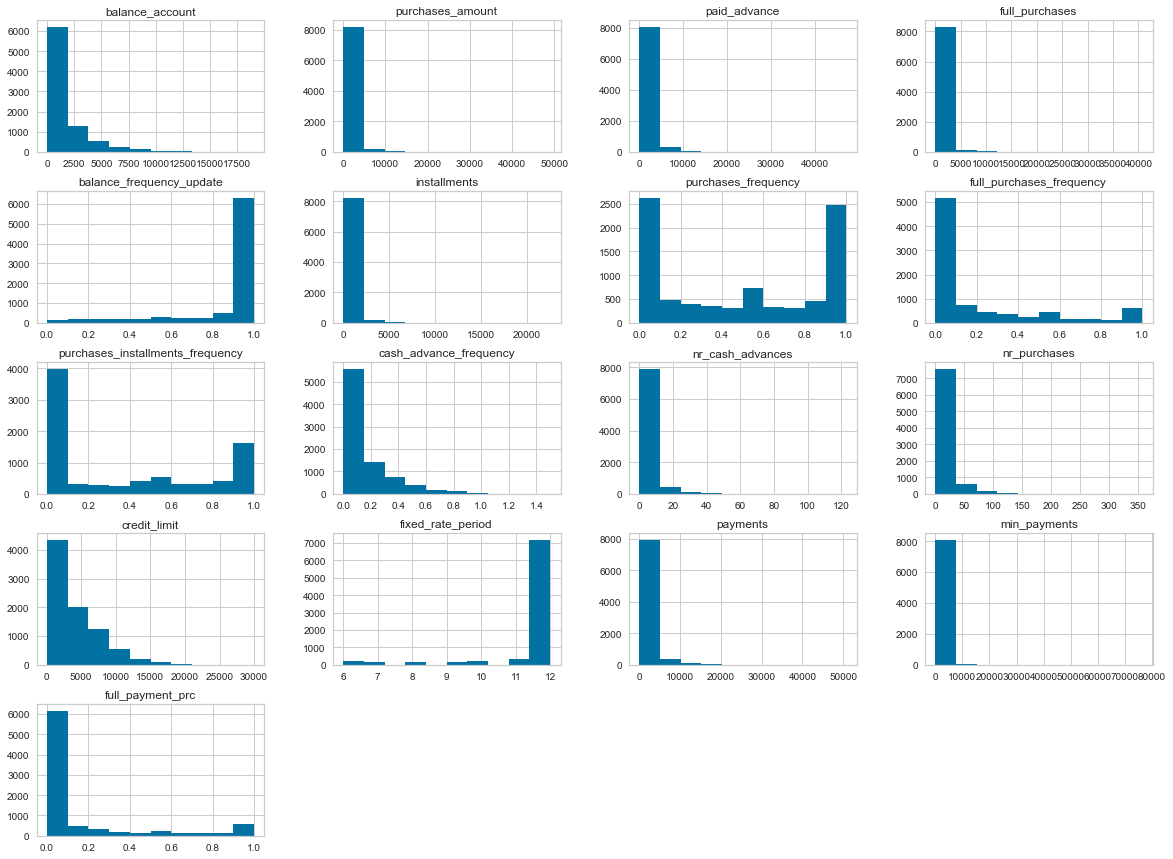

In [8]:
cc_df.hist(figsize=(20, 15));

plt.rc('font', size=8)          # controls default text sizes
plt.rc('axes', titlesize=8)     # fontsize of the axes title
plt.rc('axes', labelsize=8)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels
plt.rc('figure', titlesize=8)  # fontsize of the figure title

Observation: Many variables do not have a normal distribution and are highly skewed.

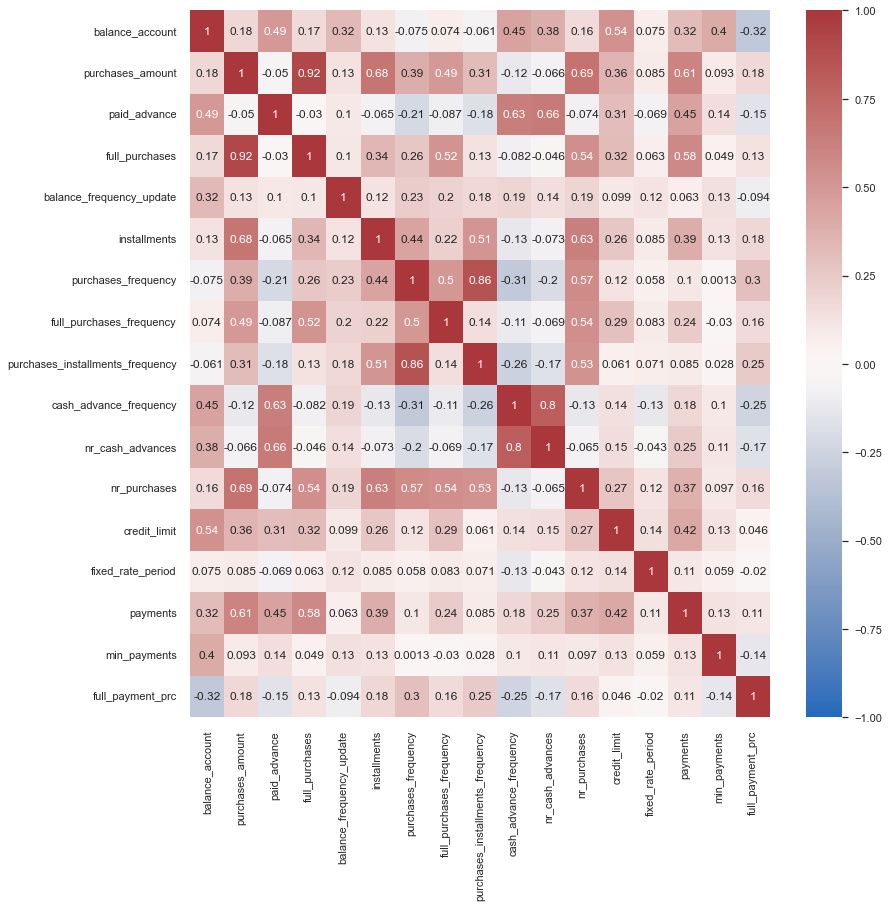

In [9]:
plt.figure(figsize=(13, 13))
sns.set(font_scale=1)
sns.heatmap(cc_df.corr(), cmap = "vlag", vmin=-1, vmax=1, annot=True);

Observation: Multicollinearity is not detected. Nonetheless, it is worth noting that purchase installment frequency and purchase frequency are (understandably) highly correlated. 

**Summary**:
- Missing data in min_payments
- No duplicated IDs (each row is unique)
- Positively skewed data
- Multicollinearity is not a problem

# **Step 2: Process & Transform the Data**

Make a copy to avoid tampering with the original file.

In [10]:
cc_df1 = cc_df.copy()
cc_df1 = cc_df1.drop('customer_id', axis = 1) 

Impute missing values and log transform the data to deal with skewness.

In [11]:
pipeline_knn = Pipeline(steps=[("knn_imputer", KNNImputer(n_neighbors=5))])
df_trans_knn=pipeline_knn.fit_transform(cc_df1)

In [12]:
df_trans_knn = pd.DataFrame(df_trans_knn, columns = cc_df1.columns)

In [13]:
 # DESCRIPTION --> # it plots the distributions of your data
def plot_distrib(df, ncols, nrows, figsize):
    vars_ = df.columns
    c = 0
    plt.figure(figsize=figsize)
    for v in vars_:
        ax = plt.subplot(nrows, ncols, c + 1)
        _, nbins, _ = plt.hist(df[v], 20, color="g", alpha=0.6, label=v)
        plt.xlabel(v)
        plt.legend(loc="best")
        c = c + 1
    plt.show()

Visualize the Imputed Data.

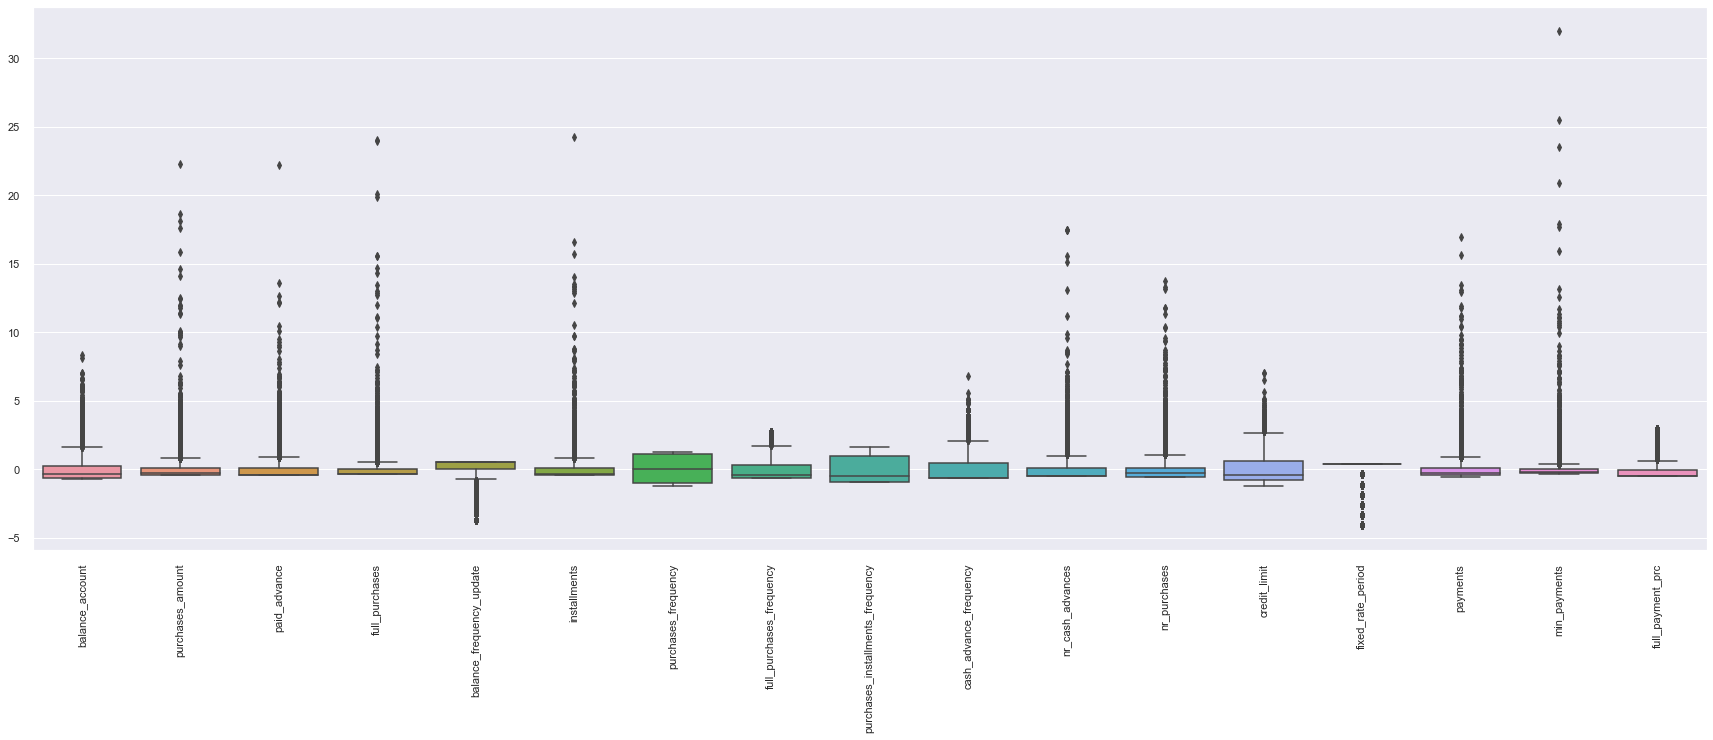

In [14]:
plt.figure(figsize=(30, 10))
scaler = StandardScaler() # Scaling the data so the plot makes sense once it is ploted
data_scaled = pd.DataFrame(scaler.fit_transform(df_trans_knn), columns=df_trans_knn.columns)
ax = sns.boxplot(data=data_scaled)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

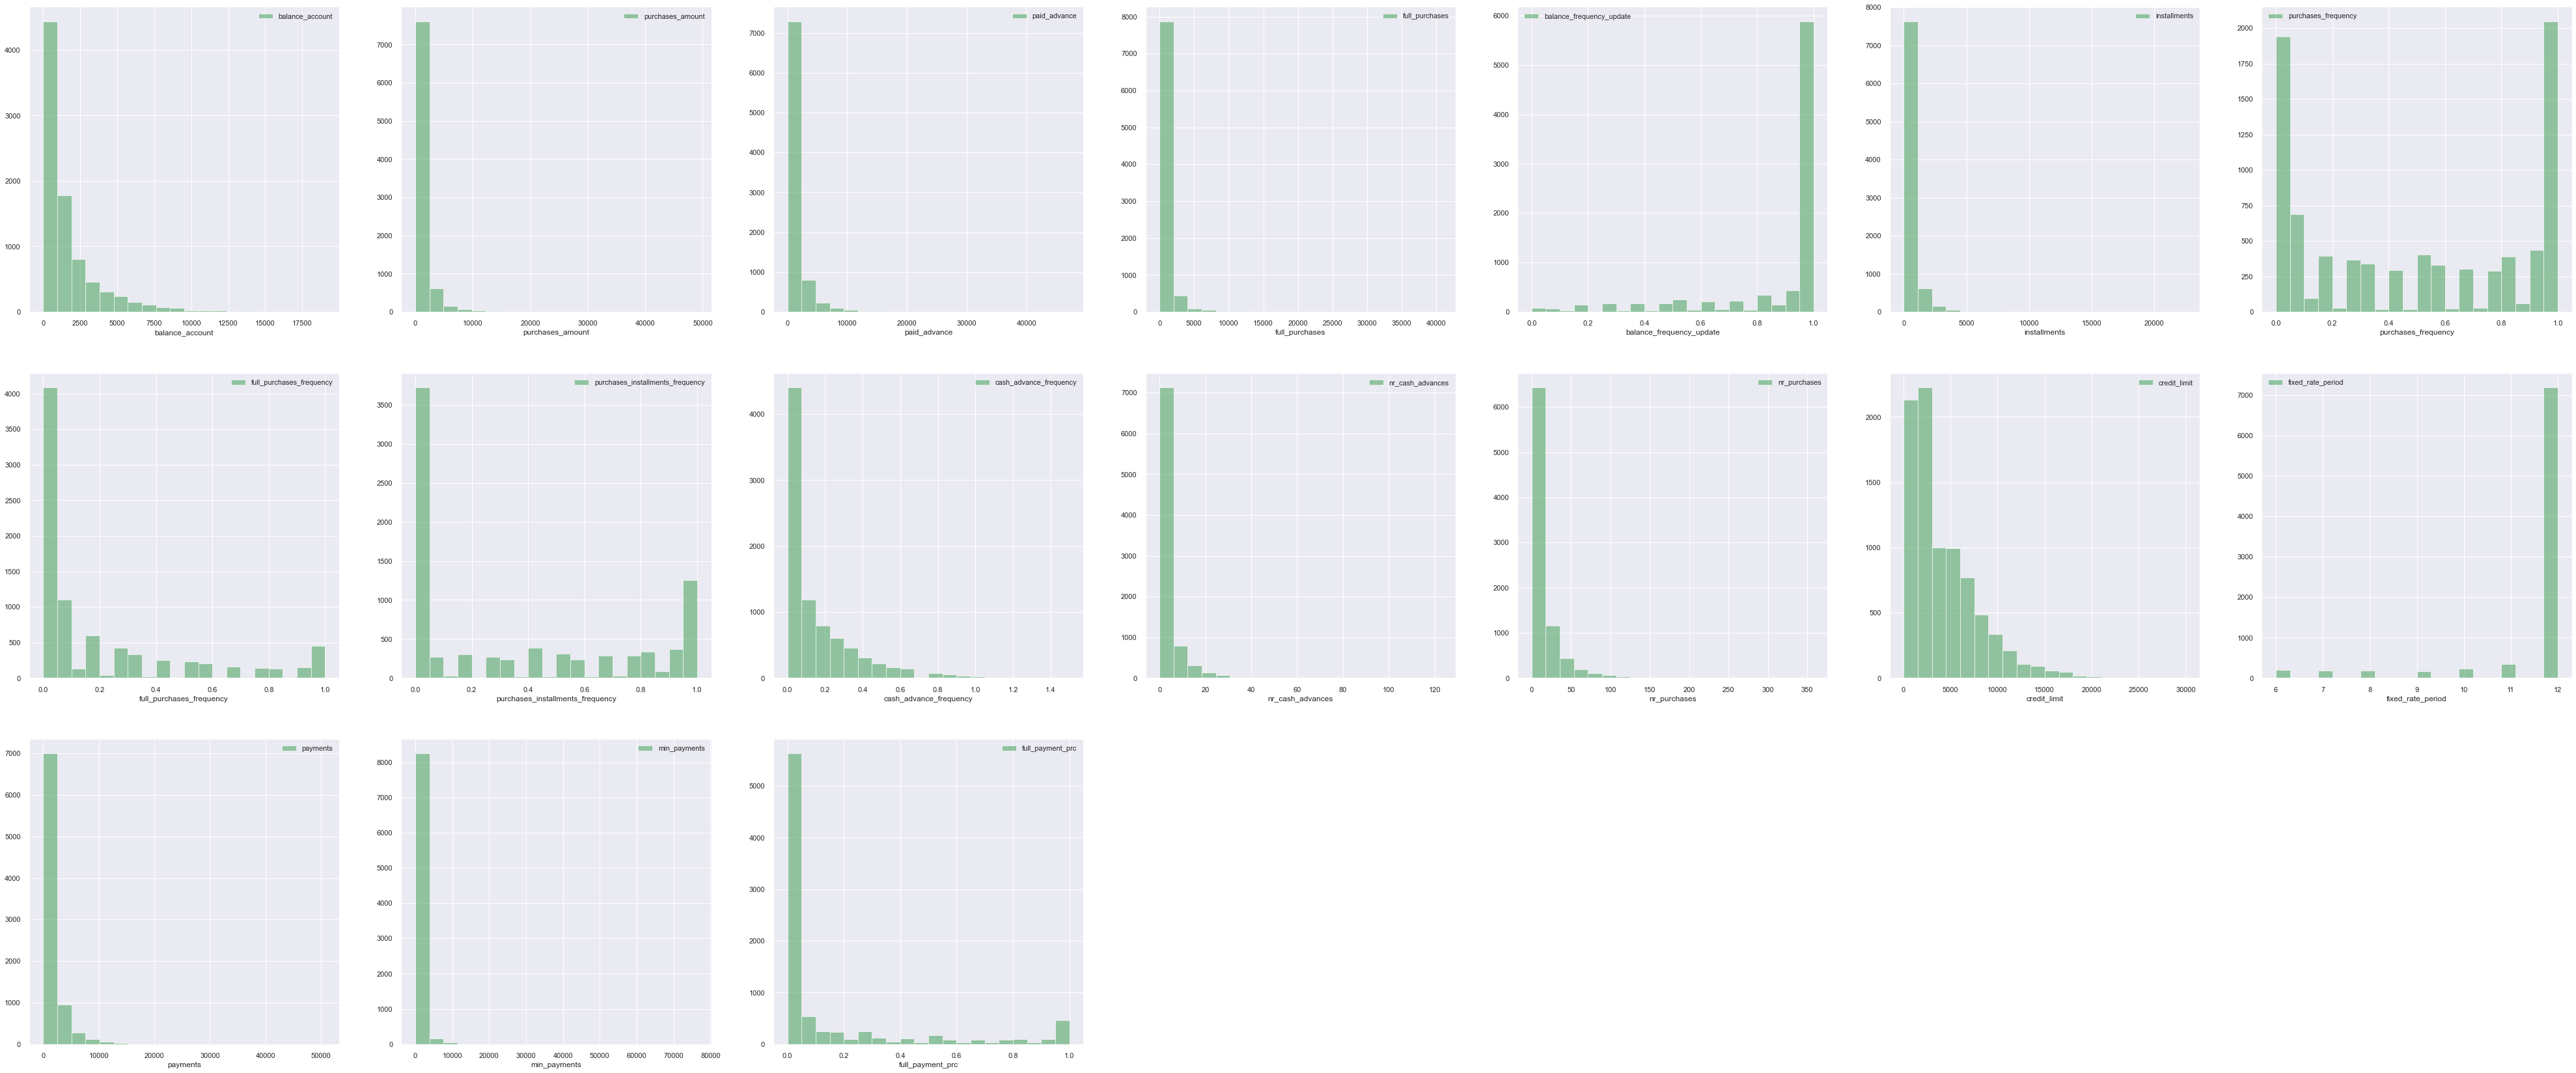

In [15]:
plot_distrib(df_trans_knn, ncols=7, nrows=5, figsize=(70, 50)) #

Log transform the data.

In [16]:
df_trans_knn_log = df_trans_knn.copy()
df_trans_knn_log = np.log(df_trans_knn_log + 1)
df_trans_knn_log.round(2)

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,2.33,4.69,0.00,0.00,0.65,4.69,0.65,0.00,0.60,0.00,0.00,2.40,6.91,2.48,4.51,4.51,0.36
1,3.98,5.02,0.00,0.00,0.69,5.02,0.69,0.00,0.61,0.00,0.00,1.95,6.91,1.95,4.02,4.43,0.00
2,7.22,0.00,6.14,0.00,0.69,0.00,0.00,0.00,0.00,0.24,1.95,0.00,7.31,2.48,5.72,6.10,0.00
3,7.61,5.90,0.00,5.90,0.69,0.00,0.69,0.69,0.00,0.00,0.00,2.64,7.60,2.56,6.56,6.68,0.00
4,3.15,4.56,7.06,4.56,0.31,0.00,0.08,0.08,0.00,0.15,1.39,0.69,7.82,2.56,8.32,3.72,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,7.03,0.00,5.61,0.00,0.69,0.00,0.00,0.00,0.00,0.08,0.69,0.00,9.05,2.56,6.50,5.57,0.00
8496,3.11,5.02,0.00,0.00,0.69,5.02,0.65,0.00,0.65,0.00,0.00,2.48,7.31,2.56,4.96,5.02,0.15
8497,0.00,0.00,5.54,0.00,0.00,0.00,0.00,0.00,0.00,0.11,0.69,0.00,6.22,2.30,7.80,4.79,0.00
8498,7.41,6.95,4.99,6.95,0.69,0.00,0.46,0.46,0.00,0.15,1.10,3.95,8.01,2.56,6.14,6.21,0.00


Visualized the log transformed data.

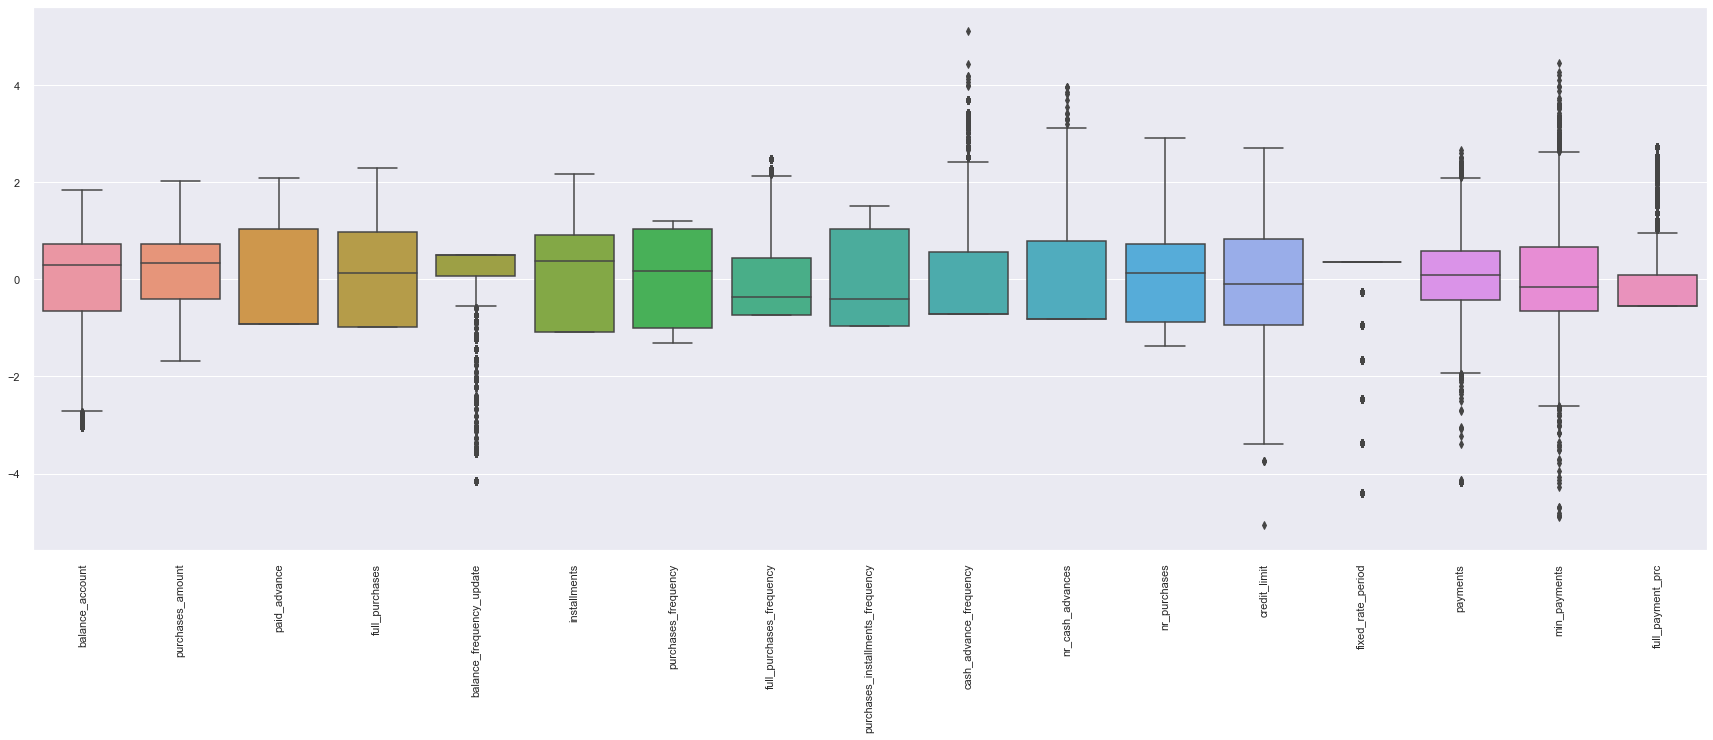

In [17]:
plt.figure(figsize=(30, 10))
scaler = StandardScaler() # Scaling the data so the plot makes sense once it is ploted
data_scaled = pd.DataFrame(scaler.fit_transform(df_trans_knn_log), columns=df_trans_knn_log.columns)
ax = sns.boxplot(data=data_scaled)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

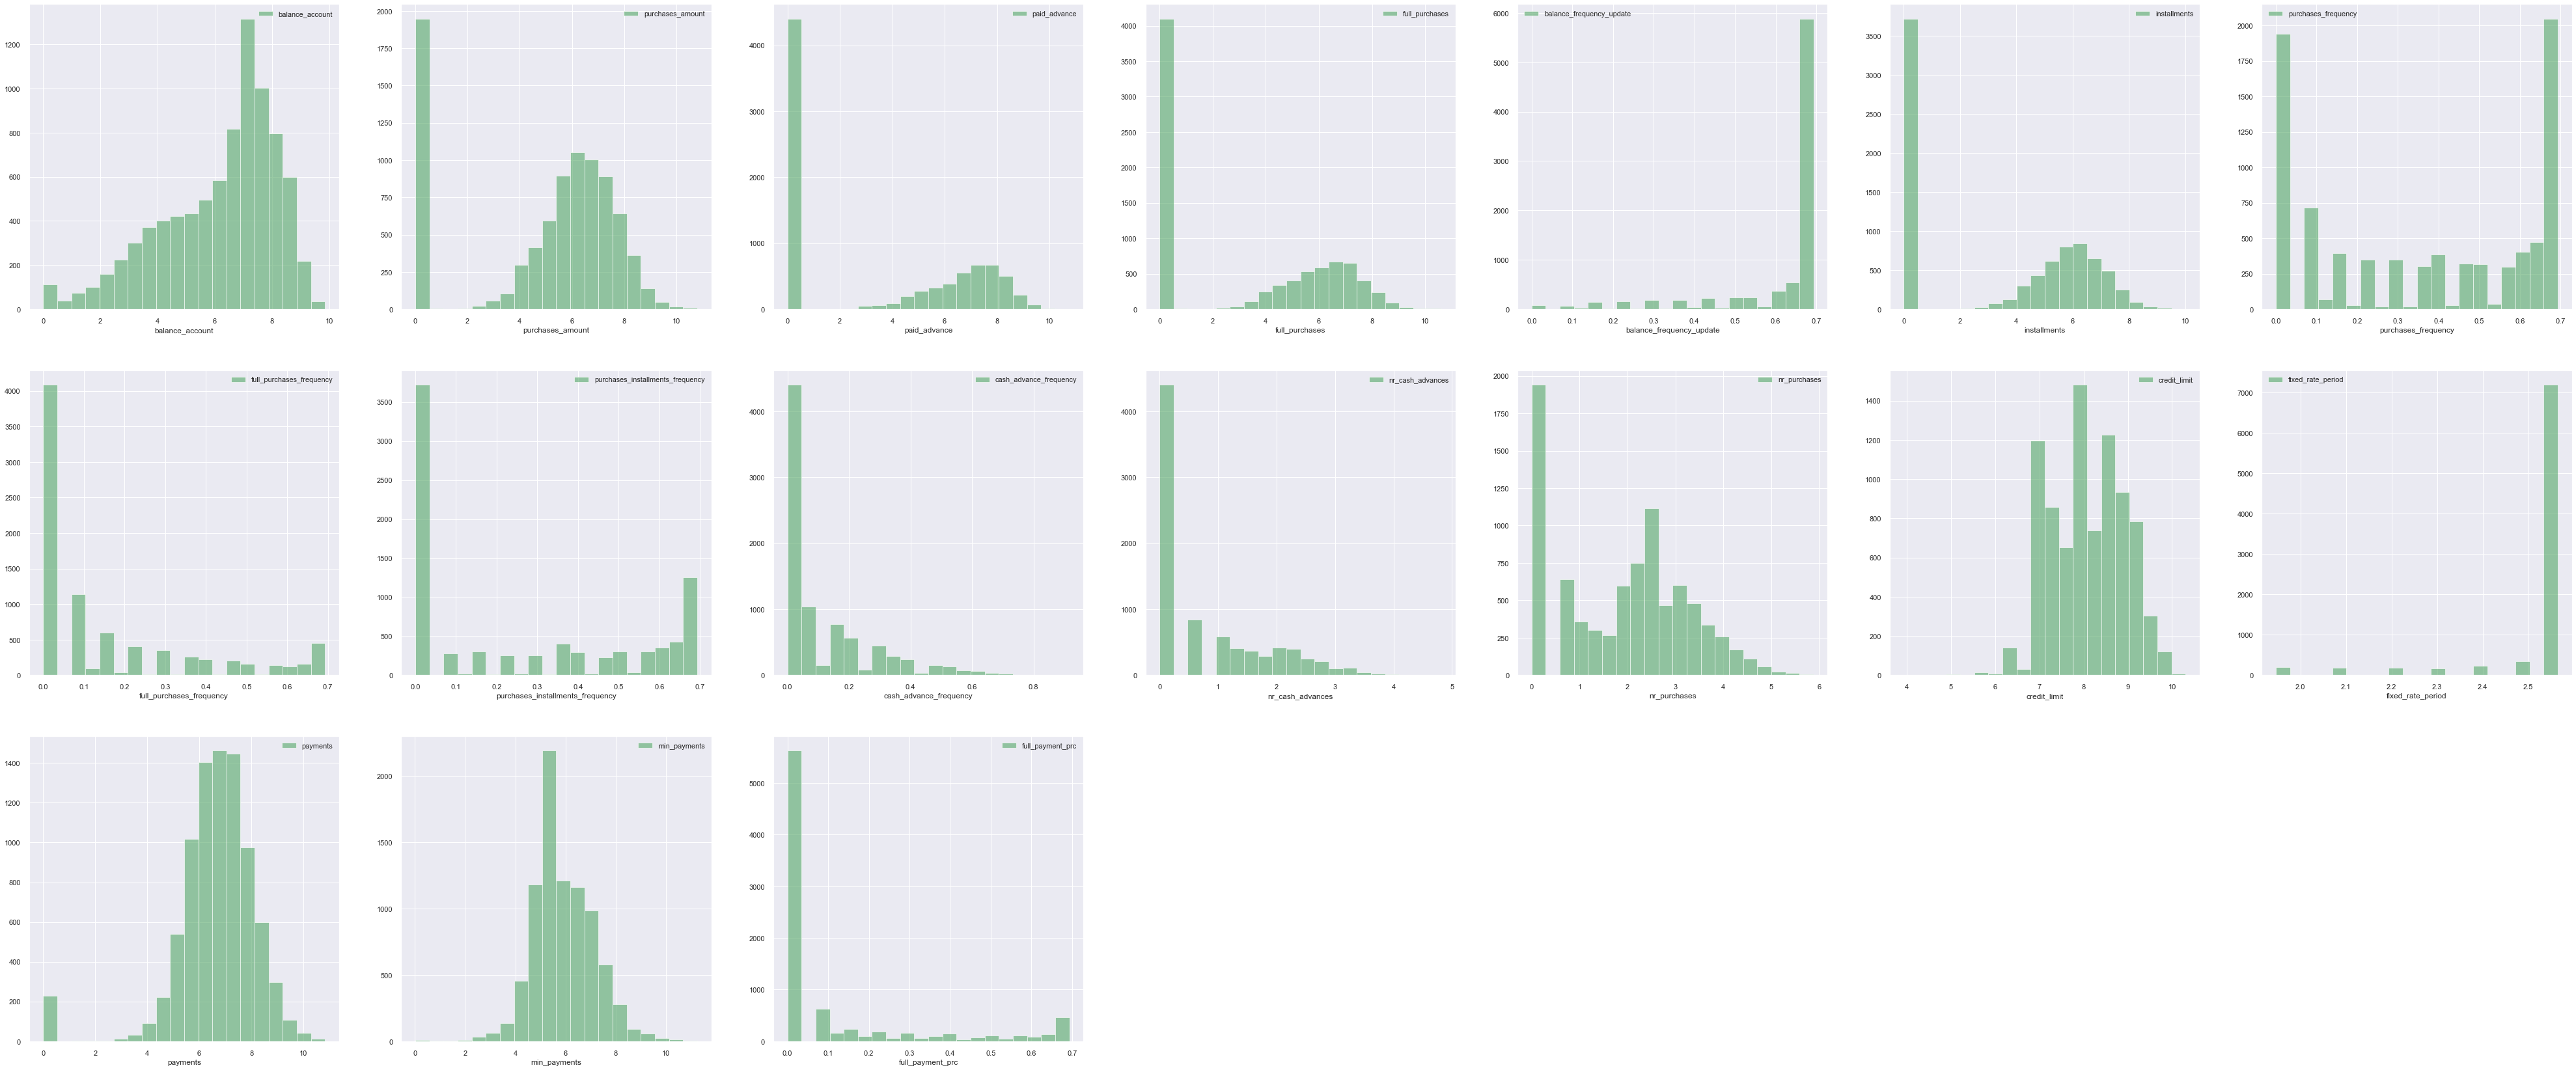

In [18]:
plot_distrib(df_trans_knn_log, ncols=7, nrows=5, figsize=(70, 50)) #

**Summary:**
- After log transforming the data, the features have a less skewed distribution

# **Step 3: Determining the # of clusters**

Yellow Brick Visualizer (Implements the Elbow Method fitting a K-Means Model).

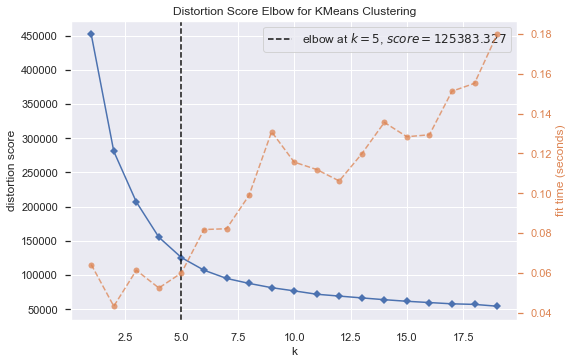

In [19]:
model = KMeans(random_state=17, verbose=0)
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(df_trans_knn_log.values)
visualizer.show();

Conclusion: There are probably 5 clusters (customer segments represented in the data).

Additional analysis (using Silhouette scores) below to validate the above results.

0.36514212355546405


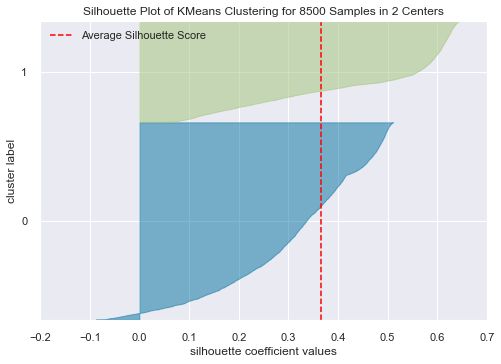

0.3770934074245626


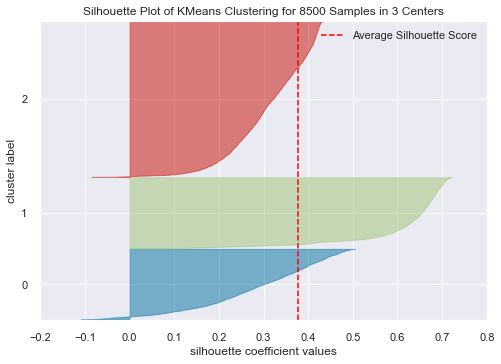

0.39960231981216593


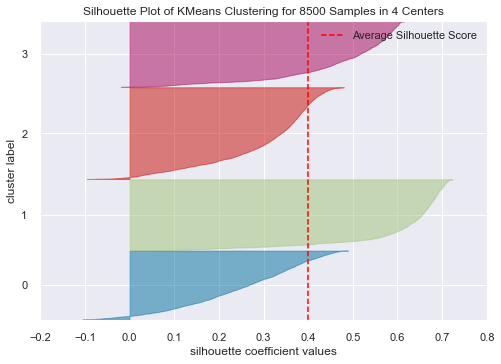

0.42414888994665995


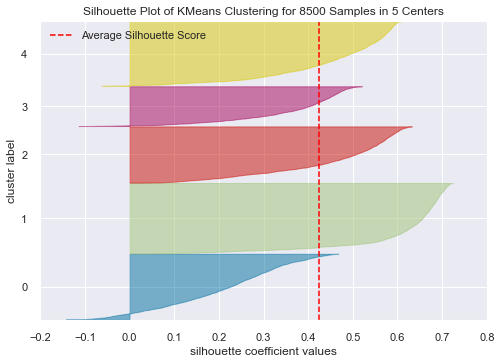

0.4374090611621468


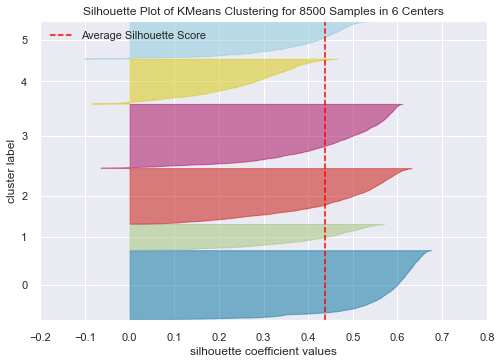

0.45547098087409815


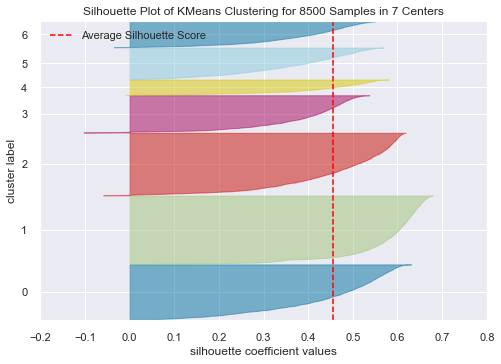

0.4122800056296468


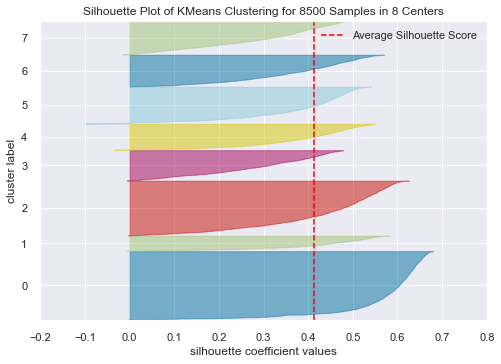

0.347247661381568


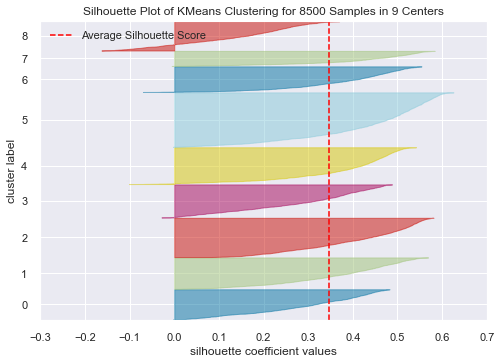

In [20]:
yellowbrick_X = df_trans_knn_log.values
yellowbrick_score = []

for i in range(2, 10):
  model_k_mean = KMeans(i, random_state=42, verbose = 0)
  visualizer = SilhouetteVisualizer(model_k_mean, colors='yellowbrick')
  visualizer.fit(yellowbrick_X)        # Fit the data to the visualizer
  print(visualizer.silhouette_score_)
  yellowbrick_score.append((visualizer.n_clusters_, visualizer.silhouette_score_))
  visualizer.show()  

The ideal # of clusters will yield Silhouette scores that are not negative and that have even segments that extend past the red line.

Using a TSNE Model to reduce dimensionality and visualize the clusters.

In [21]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)
X_tsne = tsne.fit_transform(df_trans_knn_log.values)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8500 samples in 0.001s...
[t-SNE] Computed neighbors for 8500 samples in 0.356s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8500
[t-SNE] Computed conditional probabilities for sample 2000 / 8500
[t-SNE] Computed conditional probabilities for sample 3000 / 8500
[t-SNE] Computed conditional probabilities for sample 4000 / 8500
[t-SNE] Computed conditional probabilities for sample 5000 / 8500
[t-SNE] Computed conditional probabilities for sample 6000 / 8500
[t-SNE] Computed conditional probabilities for sample 7000 / 8500
[t-SNE] Computed conditional probabilities for sample 8000 / 8500
[t-SNE] Computed conditional probabilities for sample 8500 / 8500
[t-SNE] Mean sigma: 0.771626
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.656868
[t-SNE] KL divergence after 1000 iterations: 1.053195


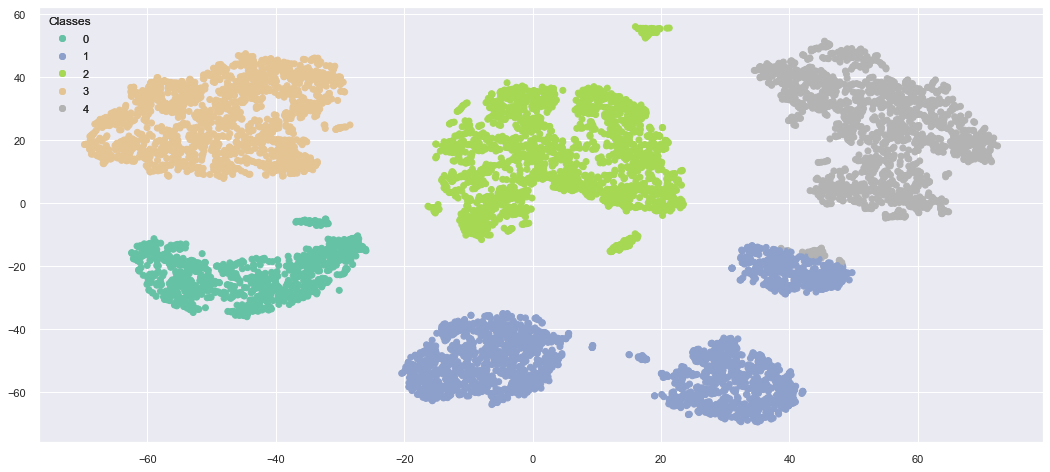

In [22]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_tsne)
labels = kmeans.predict(X_tsne)


customers_id = cc_df["customer_id"]

df_tsne = df_trans_knn.copy()
df_tsne["cluster"] = labels
df_tsne = df_tsne.set_index(customers_id.astype(str))

fig, ax = plt.subplots(figsize=(18,8))
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_tsne["cluster"].values, cmap=plt.cm.Set2)
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
ax.add_artist(legend)
plt.show()

# **Step 5: Clustering and Segmenting the Data**

Using KMeans Model.

In [35]:
model_5 = KMeans(5, random_state=42, verbose = 0)
test5 = model_5.fit_predict(yellowbrick_X)

In [36]:
df_trans_knn_log['cluster5'] = test5
df_trans_knn_log

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc,cluster5
0,2.331989,4.687671,0.000000,0.000000,0.646627,4.687671,0.646627,0.000000,0.597837,0.000000,0.000000,2.397895,6.908755,2.484907,4.509417,4.507686,0.356675,4
1,3.982788,5.019265,0.000000,0.000000,0.693147,5.019265,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,1.945910,4.020384,4.430283,0.000000,4
2,7.216559,0.000000,6.139586,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.241162,1.945910,0.000000,7.313887,2.484907,5.717133,6.097583,0.000000,1
3,7.612159,5.897648,0.000000,5.897648,0.693147,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.639057,7.601402,2.564949,6.558539,6.680679,0.000000,3
4,3.149413,4.564348,7.058798,4.564348,0.310155,0.000000,0.080042,0.080042,0.000000,0.154151,1.386294,0.693147,7.824446,2.564949,8.317586,3.717036,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,7.028740,0.000000,5.606145,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.080042,0.693147,0.000000,9.047939,2.564949,6.497359,5.565583,0.000000,1
8496,3.109500,5.015357,0.000000,0.000000,0.693147,5.015357,0.650588,0.000000,0.650588,0.000000,0.000000,2.484907,7.313887,2.564949,4.962669,5.020587,0.154151,4
8497,0.000000,0.000000,5.540821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105360,0.693147,0.000000,6.216606,2.302585,7.799316,4.788441,0.000000,1
8498,7.406944,6.954963,4.994847,6.954963,0.693147,0.000000,0.459532,0.459532,0.000000,0.154151,1.098612,3.951244,8.006701,2.564949,6.139557,6.211421,0.000000,0


In [37]:
df_trans_knn['cluster5'] = test5
df_trans_knn

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc,cluster5
0,9.298409,107.60,0.000000,0.00,0.909091,107.60,0.909091,0.000000,0.818182,0.000000,0.0,10.0,1000.0,11.0,89.868853,89.711672,0.428571,4
1,52.666422,150.30,0.000000,0.00,1.000000,150.30,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,6.0,54.722514,82.955180,0.000000,4
2,1360.795674,0.00,462.861443,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.272727,6.0,0.0,1500.0,11.0,303.031979,443.781316,0.000000,1
3,2021.641161,363.18,0.000000,363.18,1.000000,0.00,1.000000,1.000000,0.000000,0.000000,0.0,13.0,2000.0,12.0,704.240770,795.859808,0.000000,3
4,22.322374,95.00,1162.045833,95.00,0.363636,0.00,0.083333,0.083333,0.000000,0.166667,3.0,1.0,2500.0,12.0,4094.261427,40.142262,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,1127.607606,0.00,271.093275,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.083333,1.0,0.0,8500.0,12.0,662.387331,260.277533,0.000000,1
8496,21.409828,149.71,0.000000,0.00,1.000000,149.71,0.916667,0.000000,0.916667,0.000000,0.0,11.0,1500.0,12.0,141.974905,150.500248,0.166667,4
8497,0.000000,0.00,253.887233,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.111111,1.0,0.0,500.0,9.0,2437.932505,119.113995,0.000000,1
8498,1646.384530,1047.34,146.650389,1047.34,1.000000,0.00,0.583333,0.583333,0.000000,0.166667,2.0,51.0,3000.0,12.0,462.848132,497.408854,0.000000,0


# **Analyzing the Clusters**

We decided to use the raw values rather than the logged values so we could infer the differences between clusters more clearly. 

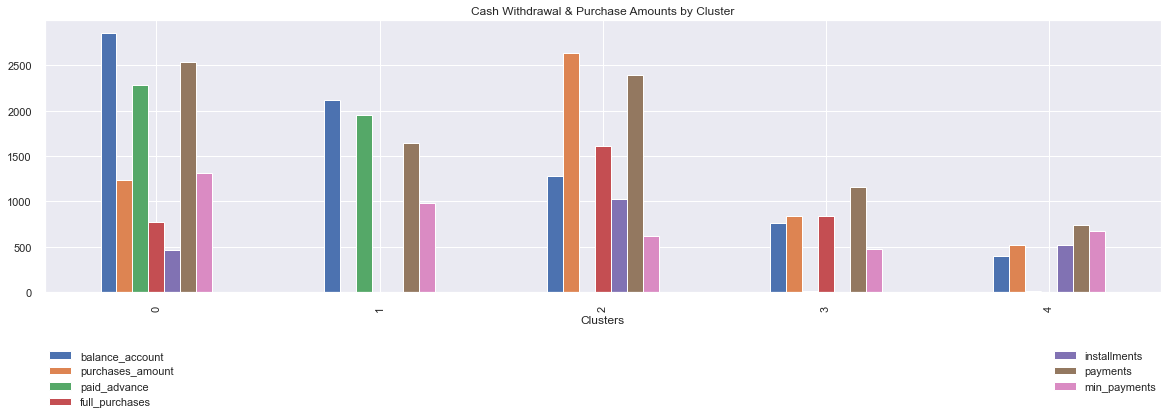

In [50]:
df_mean_Nr = df_trans_knn[['balance_account', 'purchases_amount', 'paid_advance', 'full_purchases',
       'installments', 'payments', 'min_payments',
       'cluster5']].groupby('cluster5').mean()

ax = df_mean_Nr.plot(kind="bar", figsize=(20, 5))

# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
ax.legend(bbox_to_anchor=(0., -0.1, 1., -0.1), loc=1,
                      ncol=2, mode="expand", borderaxespad=0.)
plt.title('Cash Withdrawal & Purchase Amounts by Cluster')
plt.savefig('Appendix_CashWithdrawam_Purchase_Amount.png', dpi=300, bbox_inches='tight')
plt.xlabel('Clusters');
# Enabled us to look across clustuers. 

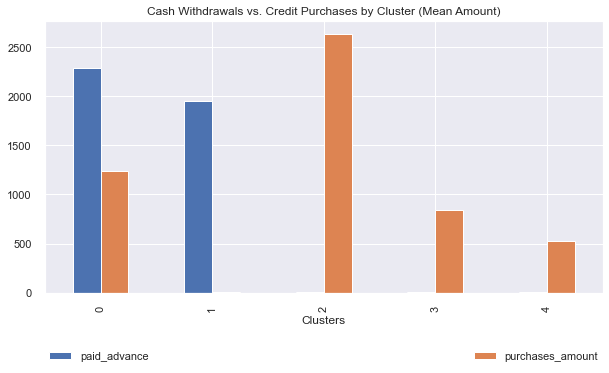

In [52]:
df_mean_Nr11 = df_trans_knn[['paid_advance', 'purchases_amount', 'cluster5']].groupby('cluster5').mean()

ax = df_mean_Nr11.plot(kind="bar", figsize=(10, 5))

# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
ax.legend(bbox_to_anchor=(0., -0.1, 1., -0.1), loc=1,
                      ncol=2, mode="expand", borderaxespad=0.)
plt.title('Cash Withdrawals vs. Credit Purchases by Cluster (Mean Amount)')
plt.savefig('Cash_v_Credit_Amount.png', dpi=300, bbox_inches='tight')
plt.xlabel('Clusters');

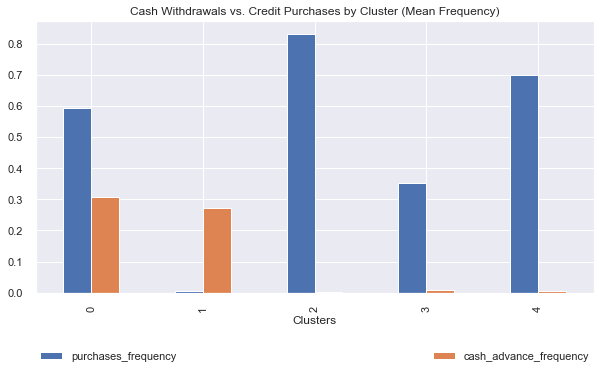

In [54]:
df_med_fr11 = df_trans_knn[['purchases_frequency','cash_advance_frequency', 'cluster5']].groupby('cluster5').mean()

ax = df_med_fr11.plot(kind="bar", figsize=(10, 5))

# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
ax.legend(bbox_to_anchor=(0., -0.1, 1., -0.1), loc=1,
                      ncol=2, mode="expand", borderaxespad=0.)
plt.title('Cash Withdrawals vs. Credit Purchases by Cluster (Mean Frequency)')
plt.savefig('Cash_v_Credit_Frequency.png', dpi=300, bbox_inches='tight')
plt.xlabel('Clusters');

Observations: Cluster 0 and 1 are different from the other clusters in that they use their credit card to withdraw cash (cash_in_advance / paid_avance). This is different from Clusters 2, 3 and 4 who use their credit card predominantly to make purchases. 

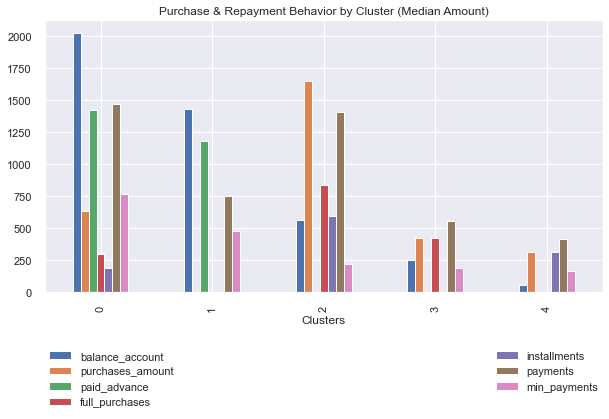

In [55]:
df_med_Nr = df_trans_knn[['balance_account', 'purchases_amount', 'paid_advance','full_purchases', 
                          'installments', 'payments', 'min_payments', 'cluster5']].groupby('cluster5').median()

ax = df_med_Nr.plot(kind="bar", figsize=(10, 5))

# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
ax.legend(bbox_to_anchor=(0., -0.1, 1., -0.1), loc=1,
                      ncol=2, mode="expand", borderaxespad=0.)
plt.title('Purchase & Repayment Behavior by Cluster (Median Amount)')
plt.savefig('Purchase_n_Repayment_Amt.png', dpi=300, bbox_inches='tight')
plt.xlabel('Clusters');

Observations:
- Balance amount:
> - Cluster 0 has the largest balance
> - Cluster 4 has considerably less than all the other clusters
- Purchasing behavior:
> - Cluster 2 makes the largest amount of purchases on their credit cards
> - Cluster 3 and Cluster 4 tend to make smaller purchases than Cluster 2
- Repayment behavior:
> - Cluster 2 pays in a mixture of full and installments
> - Cluster 3 tends to pay in full
> - Cluster 4 predominantly pays in installments

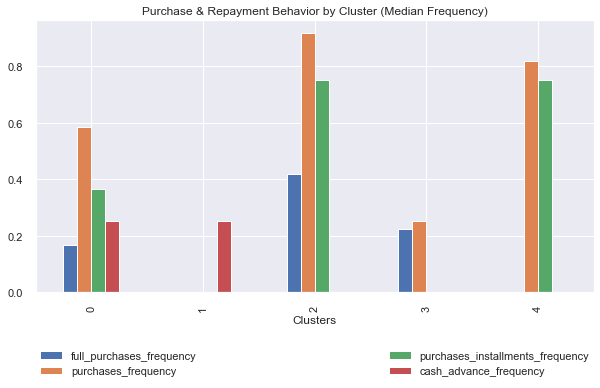

In [56]:
df_med_fr2 = df_trans_knn[['full_purchases_frequency', 'purchases_frequency','purchases_installments_frequency', 
                           'cash_advance_frequency','cluster5']].groupby('cluster5').median()

ax = df_med_fr2.plot(kind="bar", figsize=(10, 5))

# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
ax.legend(bbox_to_anchor=(0., -0.1, 1., -0.1), loc=1,
                      ncol=2, mode="expand", borderaxespad=0.)
plt.title('Purchase & Repayment Behavior by Cluster (Median Frequency)')
plt.savefig('Purchase_n_Repayment_Frequency.png', dpi=300, bbox_inches='tight')
plt.xlabel('Clusters');

Observations:
- Cluster 2 tends to purchase frequently and make relatively large purchases (see last graph)
- Cluster 3 tend to make smaller purchases and use their credit cards infrequently
- Cluster 4 use their credit cards frequently but use installments to make payment most of the time.

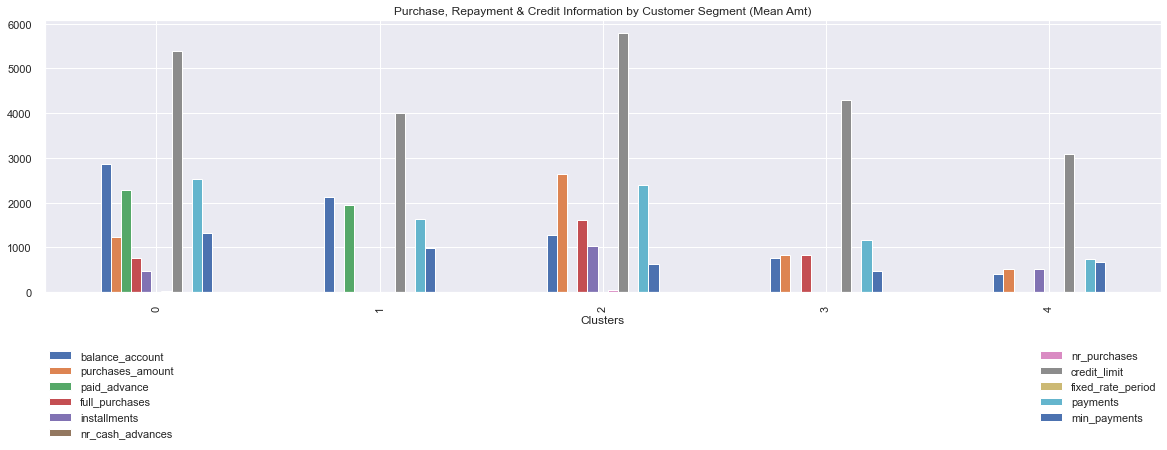

In [58]:
df_mean32 = df_trans_knn[['balance_account', 'purchases_amount', 'paid_advance', 'full_purchases',
       'installments', 'nr_cash_advances', 'nr_purchases',
       'credit_limit', 'fixed_rate_period', 'payments', 'min_payments',
       'cluster5']].groupby('cluster5').mean()

ax = df_mean32.plot(kind="bar", figsize=(20, 5))

# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
ax.legend(bbox_to_anchor=(0., -0.1, 1., -0.1), loc=1,
                      ncol=2, mode="expand", borderaxespad=0.)
plt.title('Purchase, Repayment & Credit Information by Customer Segment (Mean Amt)')
plt.savefig('Purchase_Repayment_Credit_Amt.png', dpi=300, bbox_inches='tight')
plt.xlabel('Clusters');

Conclusions:

- **Cluster 0: Cash and Credit**
>- High value customer segment
>- Heavy usage of their credit cards for credit and cash
>- Highest balance & second highest credit limit
>- Reliable for paying their credit card bills (compare payments vs. purchase + paid_advance)

- **Cluster 1: Cash only**
>- Only uses their credit cards to withdraw cash
>- Reliable for paying their credit card bills (payments vs. paid_advance)


- **Cluster 2: Mostly Reliably Heavy Spenders**
>- Predominantly uses their cred cards to make purchases
>- High value customers as well
>>- Purchases large amounts frequently
>>- Highest credit limit
>- Reliable for paying their credit card bills (compare payments vs. purchase + paid_advance)
>>- Pays in full & uses installments

- **Cluster 3: Reliable Light Spenders**
>- Predominantly uses their cred cards to make purchases
>- Purchases infrequently and for low amounts
>- Highly reliable for paying their credit card bills
>>- Mostly paying in full

- **Cluster 4: High Risk Spenders**
>- Predominantly uses their cred cards to make purchases
>- Lowest credit limit
>- Purchases using their cards frequently
>- Risk indicators
>>- Pays their credit card bills mostly in installments
>>- They often pay only slightly more than the minimum amount